In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
irs = pd.read_csv(r"C:\Users\HP\Favorites\Downloads\Iris (1).csv")
irs.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
irs.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
X = irs.iloc[:,:-1]
y = irs["Species"]

In [5]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25, random_state=42)


K=1 Accuracy: 1.00


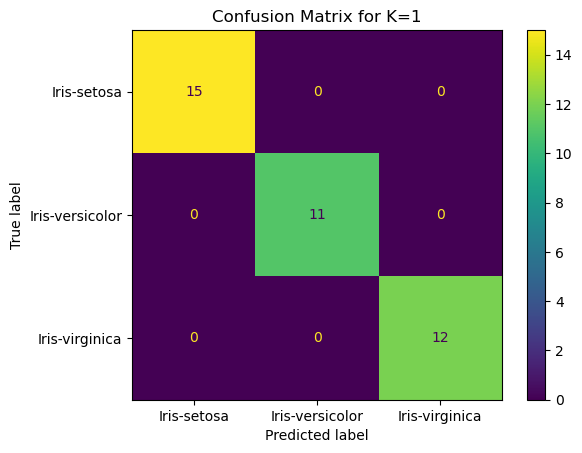


K=3 Accuracy: 1.00


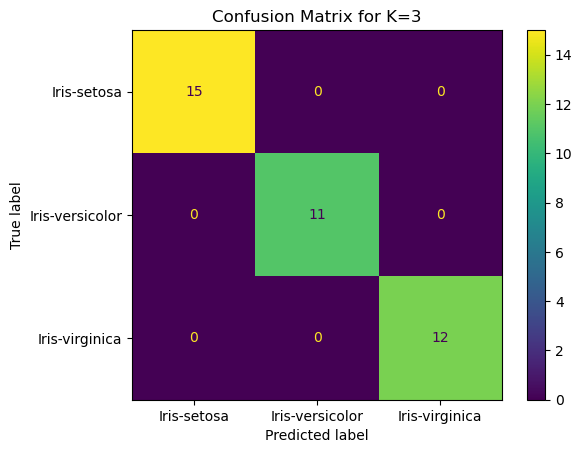


K=5 Accuracy: 1.00


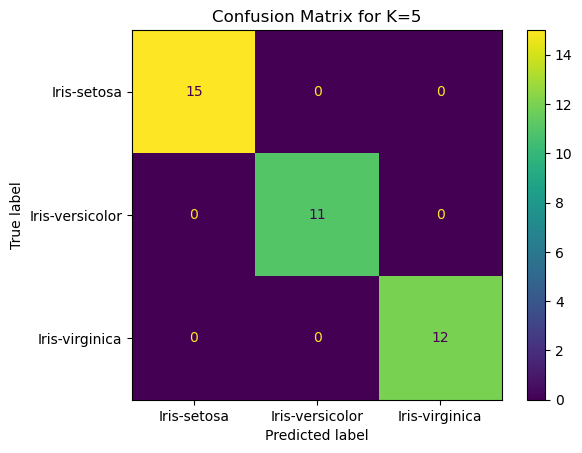


K=7 Accuracy: 1.00


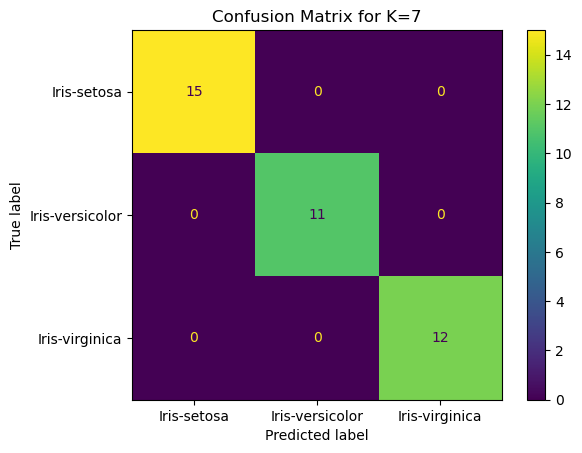


K=9 Accuracy: 1.00


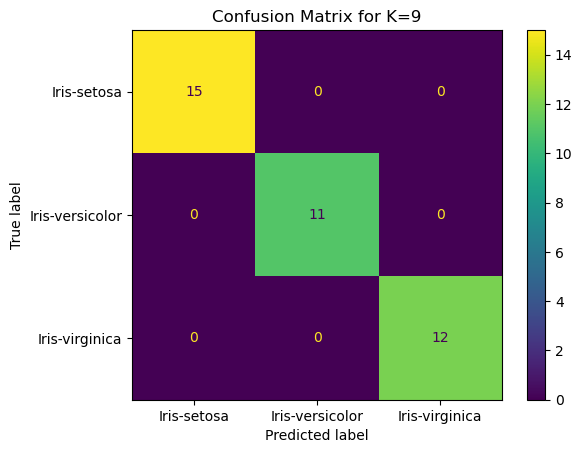

In [7]:
# StepTrain, Predict, Evaluate for different K
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    KN = KNeighborsClassifier(n_neighbors=k)
    KN.fit(X_train, y_train)
    y_pred = KN.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
    print(f"\nK={k} Accuracy: {acc:.2f}")
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot()
    plt.title(f'Confusion Matrix for K={k}')
    plt.show()

In [11]:
# Visualize Decision Boundaries using first 2 features
def plot_decision_boundary(X, y, k):
    X = X[:, :2] # only first two features
    h = 0.02
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = pd.factorize(Z)[0]  # Convert to numeric
    Z = Z.reshape(xx.shape)


    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=pd.factorize(y)[0], edgecolor='k', cmap=plt.cm.Set1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f"Decision Boundary (K={k}) using first 2 features")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

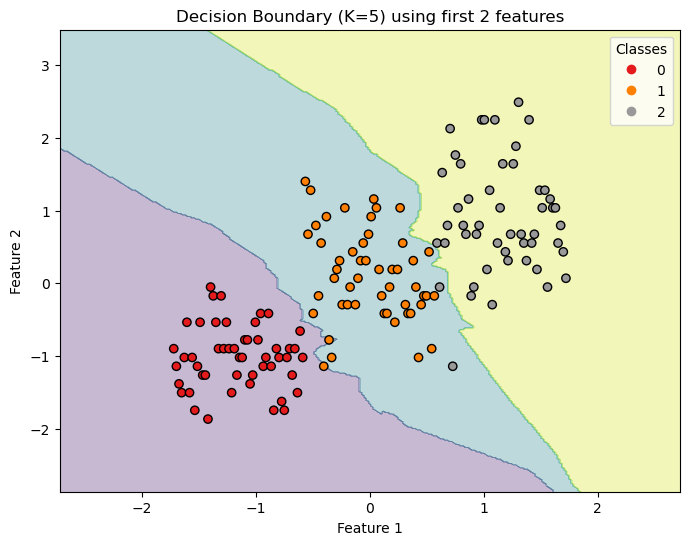

In [13]:
# Plot decision boundary for selected K
plot_decision_boundary(X_scaled, y, k=5)